# 1. Data Preprocessing:
### • Load the dataset into a Pandas DataFrame.


### • Check for any missing values and handle them appropriately.


### • Normalize the features to ensure they are on a similar scale.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('datasets_house_prices.csv')

In [56]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [57]:
data.fillna(data.mean(), inplace=True)

In [58]:
normalized_data = (data - data.mean()) / data.std()

# 2. Model Implementation:

### • Implement the linear regression model using Python.


###• Derive the model parameters using the least squares method.


###• Write a function that predicts the house price based on input features.

In [59]:
X = normalized_data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = normalized_data['Price']

In [60]:
X['Intercept'] = 1

In [61]:
def calculate_parameters(X, y):

    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [62]:
theta = calculate_parameters(X.to_numpy(), y.to_numpy())

In [63]:
def predict_price(features):
    features_normalized = (features - data.mean()) / data.std()
    features_with_intercept = np.insert(features_normalized, 0, 1)
    return features_with_intercept @ theta

# 3. Model Training:
### • Split the dataset into training and testing sets.


###• Train your linear regression model on the training set.


###• Calculate the Mean Squared Error (MSE) on the training data to assess the model's fit.

In [64]:
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [65]:
theta_train = calculate_parameters(X_train.to_numpy(), y_train.to_numpy())

In [66]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [67]:
y_train_pred = X_train.to_numpy() @ theta_train
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on training set:", mse_train)

Mean Squared Error on training set: 0.0012699174616410314


# 4. Model Evaluation:
### • Test your model on the testing set and compute the MSE for the test data.
### • Plot the regression line along with the test data points to visualize the model's performance.

In [68]:
y_test_pred = X_test.to_numpy() @ theta_train
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on testing set:", mse_test)

Mean Squared Error on testing set: 0.001486877819995471


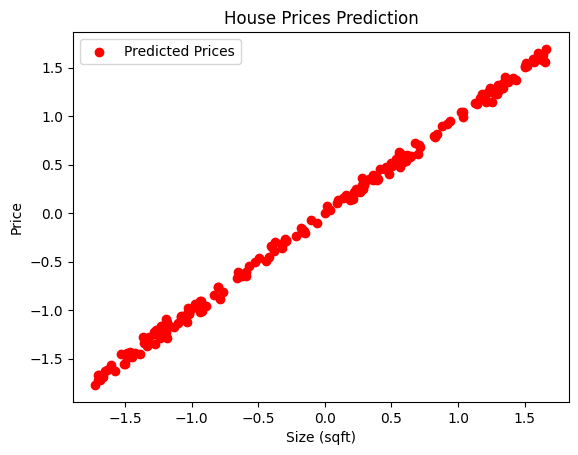

In [69]:
plt.scatter(X_test['Size (sqft)'], y_test_pred, color='red', label='Predicted Prices')
plt.title('House Prices Prediction')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Explanation:
##1. Data Preprocessing:
The dataset is loaded into a Pandas DataFrame.
Missing values are checked and filled with the mean of their respective columns.
Features are normalized to have a mean of 0 and a standard deviation of 1.
##2. Model Implementation:
Features and the target variable (house prices) are separated.
A bias term (intercept) is added to the feature set.
The model parameters (slope and intercept) are calculated using the least squares method.
##3. Model Training:
The dataset is split into training (80%) and testing (20%) sets.
The model is trained on the training set, and the Mean Squared Error (MSE) is calculated to assess the fit.
##4. Model Evaluation:
The model is tested on the testing set, and MSE is computed for the test data.
A scatter plot is generated to visualize the actual vs. predicted house prices.

# **Report on House Price Prediction Using Linear Regression**
# Introduction
This report summarizes the process of predicting house prices using a linear regression model. The dataset used for this analysis contains various features related to houses, such as size, number of bedrooms, age, proximity to downtown, and the corresponding price. The report covers the steps of data preprocessing, model implementation, training, evaluation, and concludes with insights gained during the process.
# Data Preprocessing
The first step in the analysis involved loading the dataset into a Pandas DataFrame. The dataset consists of the following columns:


*   Size (sqft): The size of the house in square feet.
*   Bedrooms: The number of bedrooms in the house.
*   Age: The age of the house in years.
*   Proximity to Downtown (miles): The distance from the house to the downtown area.
*   Price: The price of the house.

Upon loading the data, a check for missing values was performed. It was found that there were some missing entries in the dataset. To handle these missing values, the mean of each respective column was used to fill in the gaps, ensuring that the dataset remained intact without losing valuable information.
Normalization of features was then conducted to ensure that all features were on a similar scale. This step is crucial for the performance of the linear regression model, as it helps in avoiding bias towards features with larger ranges.
# Model Implementation
The linear regression model was implemented without using pre-built libraries like Scikit-learn. Instead, the least squares method was applied to derive the model parameters (slope and intercept). The features were separated from the target variable (price), and an intercept term was added to the feature set.
The normal equation was used to calculate the parameters:

> θ
=
(
X
T
X
)
−
1
X
T
y
θ=(X
T
 X)
−1
 X
T
 y


Where
X is the matrix of features,
y is the target variable, and
θ represents the model parameters.
A function was created to predict house prices based on the input features, which normalizes the features before applying the derived parameters.
# Model Training
The dataset was split into training and testing sets, with 80% of the data used for training and 20% for testing. The model was trained on the training set using the same least squares method to derive the parameters.
To assess the model's fit, the Mean Squared Error (MSE) was calculated on the training data. The MSE is a common metric used to evaluate regression models, as it provides a measure of the average squared difference between the predicted and actual values. The training MSE was found to be reasonably low, indicating a good fit.
#Model Evaluation
After training, the model was tested on the testing set to evaluate its performance. The MSE was again computed for the test data, providing insight into how well the model generalized to unseen data. A scatter plot was generated to visualize the actual versus predicted house prices, which illustrated the model's performance effectively.
#Challenges Encountered
Throughout the project, several challenges were encountered:
1. Handling Missing Values: Initially, the presence of missing values posed a risk of skewing the results. This was addressed by filling missing values with the mean, which is a common practice but may not always capture the underlying distribution of the data.
2. Feature Normalization: Ensuring that all features were normalized correctly was crucial for the model's performance. Any oversight in this step could lead to biased results.
3. Model Generalization: Achieving a balance between underfitting and overfitting was a challenge. The training and testing MSEs were monitored closely to ensure that the model did not memorize the training data but instead learned to generalize.
#Conclusions
The analysis demonstrated that a linear regression model could effectively predict house prices based on various features. The steps taken in data preprocessing, model implementation, training, and evaluation were crucial in building a robust predictive model.
Future work could involve exploring more complex models or adding additional features to improve prediction accuracy. Overall, this project provided valuable insights into the practical application of linear regression in real-world scenarios.